# DSCI 100 Group 11 Project Proposal 

# 1. Introduction

Heart disease is a common cause of death between all groups of people in the United States. Both genetic and environmental circumstances can contribute to the possibility of developing the condition. 

Multiple risk factors affect the likelihood of heart disease such as age, blood pressure, cholesterol. Older people are more likely to be diagnosed with heart disease (Rogers et al., 2019). According to the CDC, high cholesterol levels lead to plaque formation in blood vessels which makes them less flexible and narrower. Leading to the inability of blood to circulate around the body, irregular heart beats and ultimately, death. Furthermore, high blood pressure causes arteries to lose their elasticity which in turn leads to lower blood circulation to the heart.

Using the Heart Disease dataset provided to us from the UCI Machine Learning Repository, we will use 3 different factors to see whether or not each data point can be classified as <50% diameter narrowing, which means no risk of heart diseases, or >50% diameter narrowing, which would indicate a severe risk of heart disease. 

Through comparisons, these data points would assist in anticipating a prognosis of different risk levels for a patient who could provide the data of the 3 aspects we observed. 

# 2. Preliminary Data Analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(reactable)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in library(reactable): there is no package called ‘reactable’


Creating a tibble with the relevant attributes to our question. Likelihood is a factor indicating whether or not there is a likelihood of heart disease.

In [10]:
raw_data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
raw_data <- read_csv(raw_data_url,col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs","restecg", "thalach", "exang" ,"oldpeak" ,"slope" ,"ca" ,"thal" ,"num"))
tidy_data <- raw_data |>
                select(age,trestbps,chol,num) |>
                    rename("age" = "age",
                           "resting.blood.pressure" = "trestbps" ,
                           "cholesterol" = "chol",
                           "likelihood" = "num") |>
                    mutate(likelihood = case_when(likelihood == 0 ~ "Absent",
                                                  likelihood != 0 ~ "Present")) |>
                    mutate(likelihood = as.factor(likelihood))
tidy_data
                

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,resting.blood.pressure,cholesterol,likelihood
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,Absent
67,160,286,Present
67,120,229,Present
37,130,250,Absent
41,130,204,Absent
56,120,236,Absent
62,140,268,Present
57,120,354,Absent
63,130,254,Present


training data

In [11]:
set.seed(1) ## DO NOT CHANGE

## splitting into training and testing data
data_split <- initial_split(tidy_data, prop = 0.75, strata = likelihood)
data_train <- training(data_split)
data_test <- testing(data_split)

 Finding the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


In [12]:
data_count <- data_train |> 
        group_by(likelihood) |>
        summarize(count = n())
data_count

likelihood,count
<fct>,<int>
Absent,123
Present,104


In [14]:
##Average Values of all predictors for observations with "absent"

data_absent_mean <- data_train |>
        filter(likelihood == "Absent") |>
        summarize(across(age:cholesterol, mean)) |>
         rename("mean.age" = "age",
                           "mean.resting.blood.pressure" = "resting.blood.pressure" ,
                           "mean.cholesterol" = "cholesterol") 

data_absent_mean

mean.age,mean.resting.blood.pressure,mean.cholesterol
<dbl>,<dbl>,<dbl>
52.96748,130.4553,243.9106


In [16]:
##Average Values of all predictors for observations with "present"
data_present_mean <- data_train |>
        filter(likelihood == "Present") |>
        summarize(across(age:cholesterol, mean)) |>
         rename("mean.age" = "age",
                           "mean.resting.blood.pressure" = "resting.blood.pressure" ,
                           "mean.cholesterol" = "cholesterol")

data_present_mean

mean.age,mean.resting.blood.pressure,mean.cholesterol
<dbl>,<dbl>,<dbl>
57.23077,135.5096,250.5673


## Visualizations

Creating a scatterplot of Resting Blood Pressure in mm of Mercury(Hg) against Age of the patient.

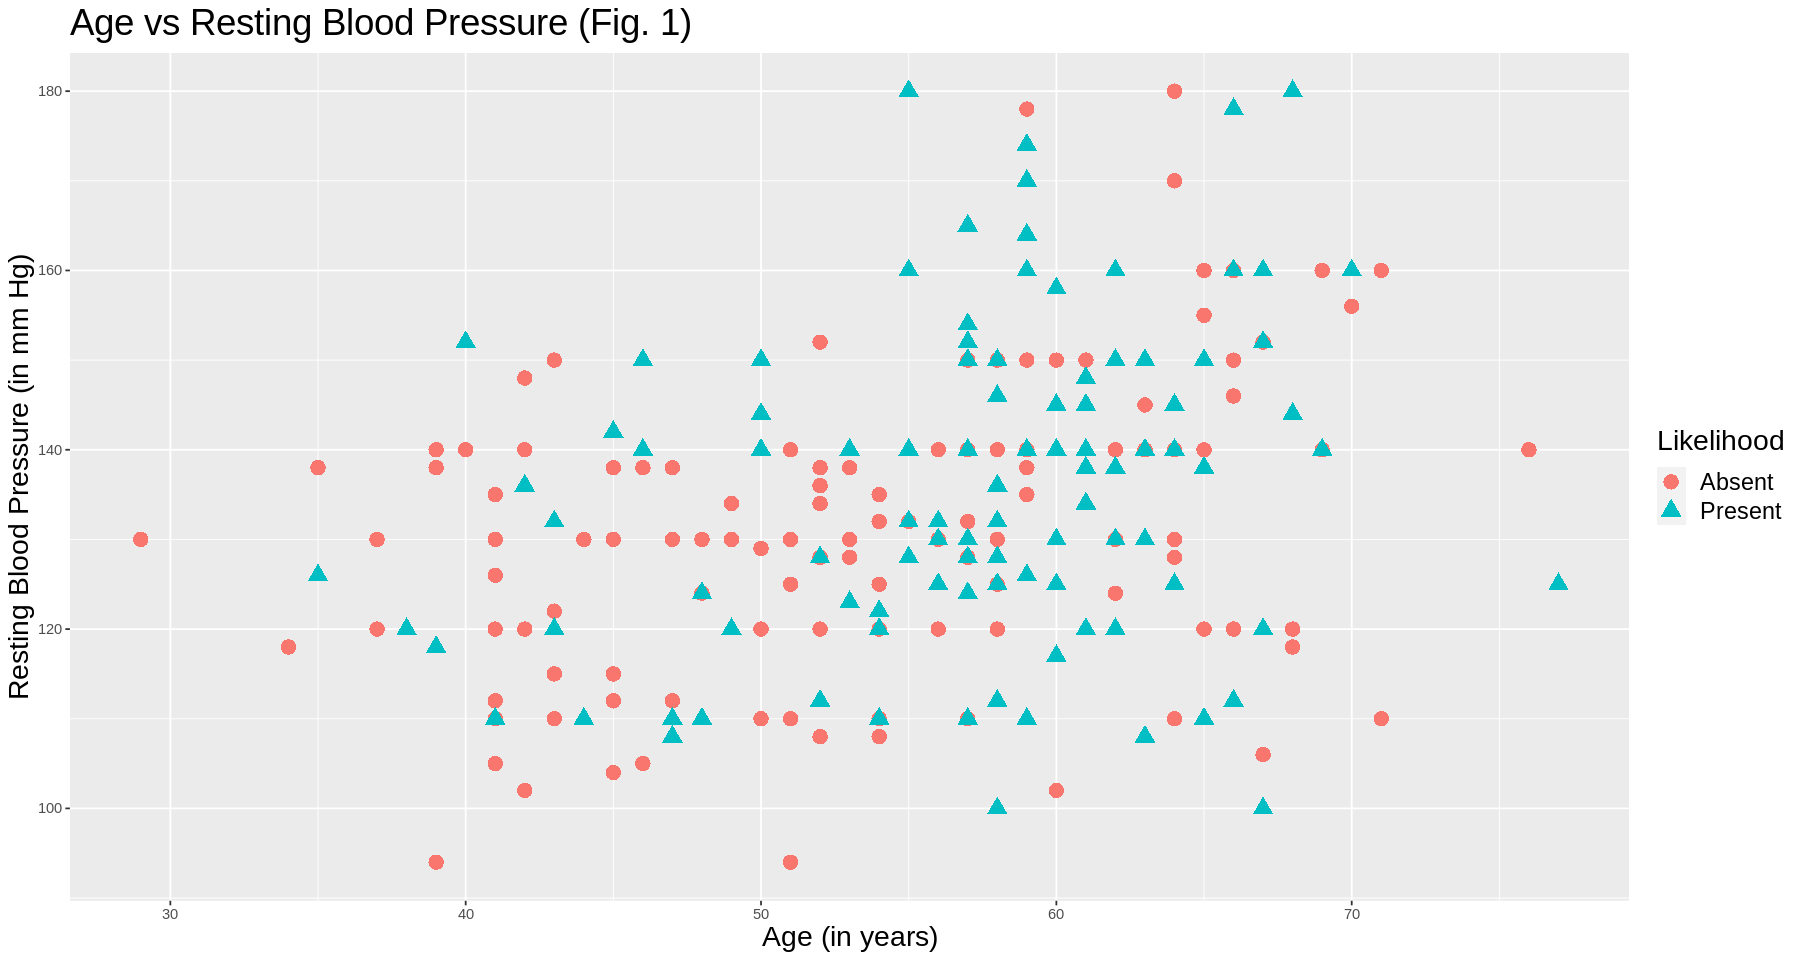

In [34]:
##Age vs Blood Pressure, coloured by likelihood

options(repr.plot.width=15, repr.plot.height=8)
age_v_bp_plot <- data_train |>
                ggplot(aes(x = age, y = resting.blood.pressure, color = likelihood, 
                           shape = likelihood)) +
                geom_point(size = 4) +
                xlab("Age (in years)") +
                ylab("Resting Blood Pressure (in mm Hg)") +
                labs(color = "Likelihood", shape = "Likelihood") +
                ggtitle("Age vs Resting Blood Pressure (Fig. 1)") + 
                theme(plot.title = element_text(size=22),
                      axis.title = element_text(size=17),
                      legend.title = element_text(size = 17),
                      legend.text = element_text(size = 14))

age_v_bp_plot

Creating a scatterplot of Cholesterol Level in mg/dl against Age of the patient.

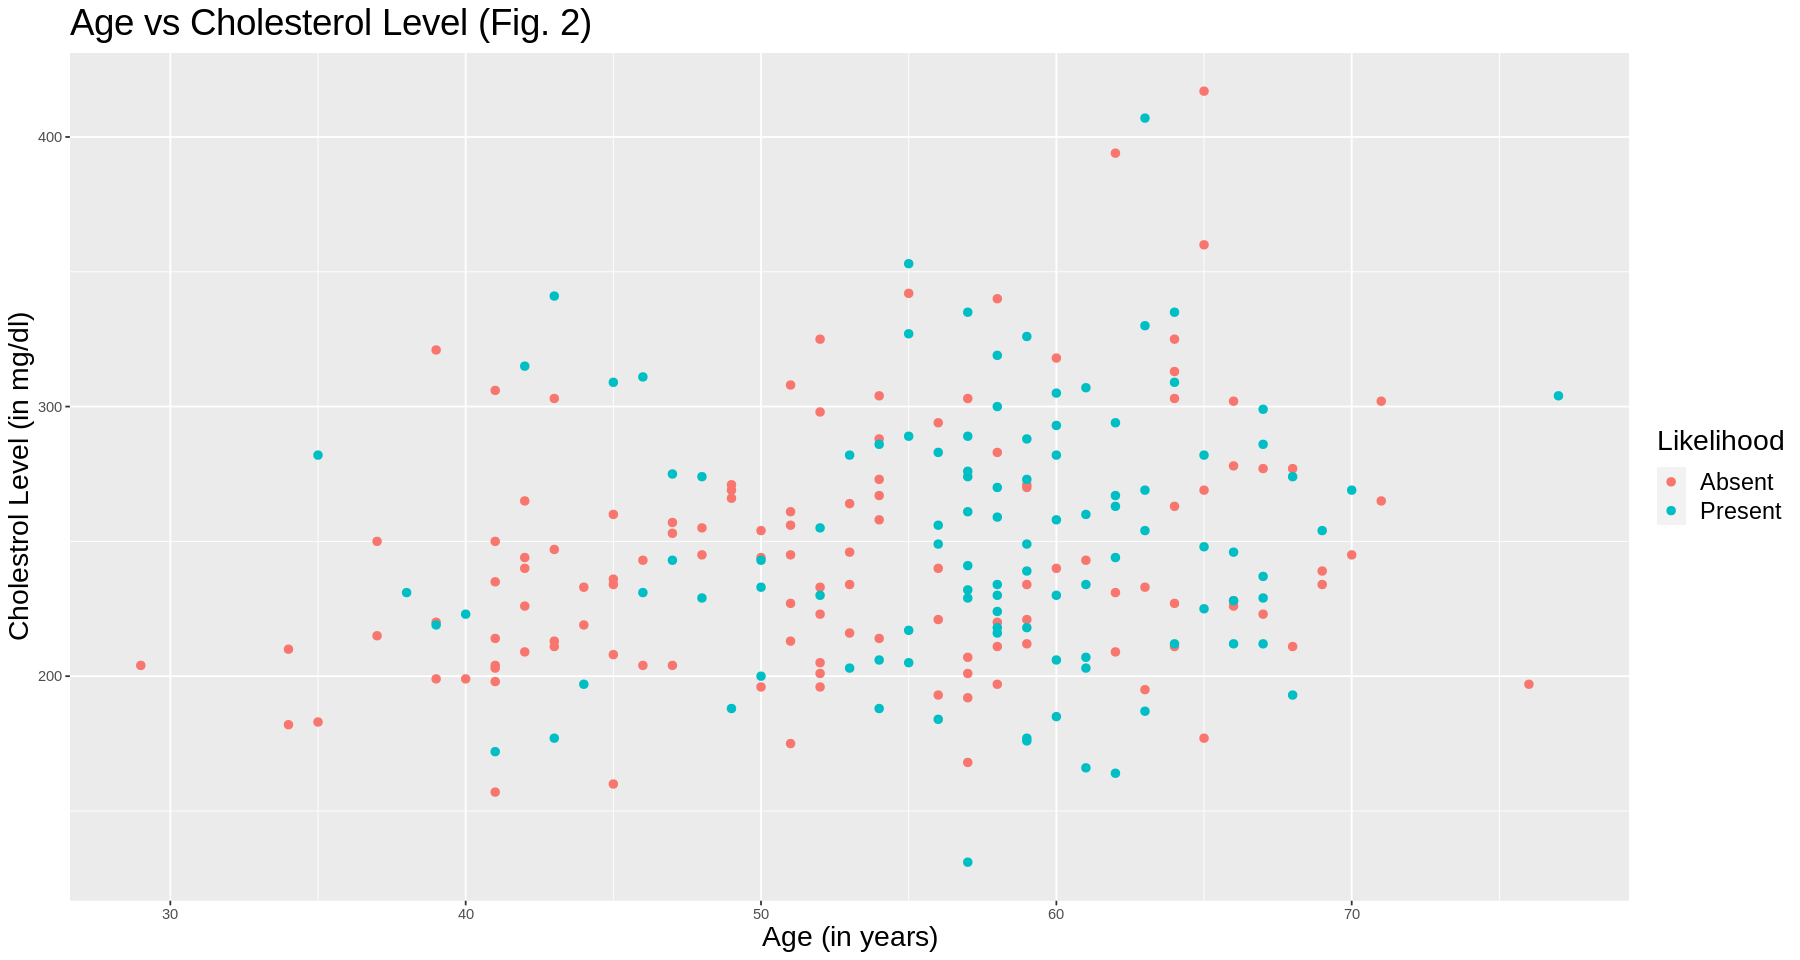

In [37]:
##Age vs Cholestrol Level, coloured by likelihood

age_v_chol_plot <- data_train |>
                ggplot(aes(x = age, y = cholesterol, color = likelihood)) +
                geom_point(size = 2) +
                xlab("Age (in years)") +
                ylab("Cholestrol Level (in mg/dl)") +
                labs(color = "Likelihood") +
                ggtitle("Age vs Cholesterol Level (Fig. 2)") + 
                theme(plot.title = element_text(size=22),
                     axis.title = element_text(size=17),
                     legend.title = element_text(size = 17),
                     legend.text = element_text(size = 14))

age_v_chol_plot

# 3. Methods

Within the data set, we will use 4 of the variables provided. They are as follows: age, blood pressure, cholesterol,  and diagnosis of heart disease. We will then plot these on graphs and colour them based on the two classes (<50% diameter narrowing or >50% diameter narrowing). The two classes will be categorized within the data by having the number 0, which would mean the absence of heart disease and any other number, which would signify the presence of the disease. Then, when we receive the new data point, we will plot it against the data already present and evaluate the risk of heart disease according to the closest data point. 

To help illustrate our observations, we will use a scatterplot. In order to ensure that what we are visualizing is clear, we will use markdown cells to describe and clarify.

# 4. Expected Outcomes and Significance 
We expect to find that those with higher cholestrol, high blood pressure and higher age will be at a much higher risk of heart disease than those with the opposite. 

Using these findings, we can encourage people to maintain a healthy lifestyle to preemptively prevent cardiovascular disease. 

In the future, the question that could arise is the proportion to which the genetics and environmental factors have an effect on the probability of getting the disease. 

# 5. Citations

- Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved March 2, 2023, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 
- Centers for Disease Control and Prevention. (2021, May 18). High blood pressure symptoms and causes. Centers for Disease Control and Prevention. Retrieved March 2, 2023, from https://www.cdc.gov/bloodpressure/about.htm#:~:text=High%20blood%20pressure%20can%20damage%20your%20arteries%20by%20making%20them,Chest%20pain%2C%20also%20called%20angina 